# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_variable = requests.get(btc_url).json()
btc_response_variable 
btc_sliced_price = btc_response_variable['data']['1']['quotes']['USD']['price']
print(btc_sliced_price)

# Fetch current ETH price
eth_response_variable = requests.get(eth_url).json()
eth_response_variable
eth_sliced_price = eth_response_variable['data']['1027']['quotes']['USD']['price']
print(eth_sliced_price)

# Compute current value of my crpto
btc_current_value = btc * btc_sliced_price
eth_current_value = eth * eth_sliced_price

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${btc_current_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_current_value:0.2f}")

57379.0
1779.67
The current value of your 1.2 BTC is $68854.80
The current value of your 5.3 ETH is $9432.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_closing_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
df_closing_prices.head()

AGG                                         SPY  \
                             open      high     low   close   volume     open   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810  394.530   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.20  113.42  6077516  394.475   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.33  113.50  4674852  389.880   

                                                              
                              high     low   close    volume  
2021-03-17 00:00:00-04:00  398.120  393.30  397.22  61876016  
2021-03-18 00:00:00-04:00  396.720  390.75  391.41  98794050  
2021-03-19 00:00:00-04:00  391.569  387.15  389.50  93819590

In [9]:
# Pick AGG and SPY close prices
agg_closing_price = float(df_closing_prices["AGG"]["close"][0])
spy_closing_price = float(df_closing_prices["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $113.87
Current SPY closing price: $397.22


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_closing_price
my_agg_value = my_agg * agg_closing_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19861.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = [
    btc_current_value + eth_current_value,
    my_spy_value + my_agg_value,
]
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,78287.051
shares,42635.000


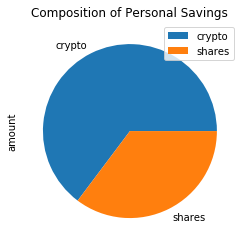

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats on meeting your savings goal for your emergency fund! Invest any surplus wisely now that you've got money in the bank.")
elif total_savings == emergency_fund:
    print("Yaay, You've saved three times your average monthly income! Keep it up.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from meeting your savings goal. Try setting aside at least 10% of your paycheck for your emergency fund.")

Congrats on meeting your savings goal for your emergency fund! Invest any surplus wisely now that you've got money in the bank.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-17', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.540  117.3000  117.31  3938694  342.96   
2020-10-23 00:00:00-04:00  117.30  117.520  117.3000  117.47  3482671  345.93   
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   

                                                                 
                               high     low    close     volume  
2020-10-22 00:00:00-04:00  345.2400  340.65  344.630   45094573  
2020-10-23 00:00:00-04:00  345.9900  343.13  345.760   38718140  
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_thirty_year = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
monte_carlo_thirty_year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
2020-10-22 00:00:00-04:00  117.51  117.540  117.3000  117.31  3938694   
2020-10-23 00:00:00-04:00  117.30  117.520  117.3000  117.47  3482671   
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   

                                           SPY                             \
                          daily_return    open      high     low    close   
2020-10-22 00:00:00-04:00          NaN  342.96  345.2400  340.65  344.630   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.9900  343.13  345.760   
2020-10-26 00:00:00-04:00     0.001447  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   

                                                   
                              volume daily_return  
2020-10-22 00:00:00-04:00   45094573          NaN  
2020-10-23 00:00:00-04:00   38718140     0.003279  
2020-10-26 00:00:00-04:00   79491839    -0.018351  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992555,0.999005,1.000725,0.997343,0.999713,1.005950,1.000638,0.997185,0.995411,1.001060,...,1.004013,1.009864,1.006256,1.001380,1.000624,0.996599,1.001536,1.000231,0.996699,0.988019
2,0.993295,1.002675,1.009775,0.989604,0.995985,1.011913,0.995029,1.010084,0.990277,1.002172,...,0.999175,1.021095,1.010072,0.990458,0.992438,0.993710,0.995812,0.997570,0.995251,0.986988
3,0.997997,1.008506,1.009726,0.990157,0.990886,1.013065,0.997029,1.012397,0.995548,1.001582,...,0.993898,1.029760,1.014746,0.984590,0.990216,0.993613,0.987153,0.997624,0.989486,0.976762
4,0.994109,1.007331,1.008806,0.991446,0.981136,1.007344,1.013018,1.014270,0.989841,1.007016,...,1.004338,1.020533,1.017071,0.971949,0.997851,0.983180,0.992659,1.000725,0.980178,0.988009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,403.615960,491.811111,325.738612,191.561796,144.143735,147.315751,292.225967,807.805026,311.699643,262.945008,...,311.786499,197.677161,221.773362,295.959604,141.452604,242.309813,156.393067,331.847063,604.242391,545.562461
7557,403.761302,492.776551,327.124143,191.416812,143.192070,146.841007,293.364552,804.626561,316.695341,261.897849,...,311.478551,197.685528,222.070323,295.548315,143.436677,246.546095,155.675408,331.581508,607.425263,547.766994
7558,405.152380,496.066708,325.849044,192.401200,143.062586,148.365075,294.393940,798.641554,318.384018,259.918007,...,308.363973,195.637601,222.371891,300.129196,143.786085,245.176018,153.432341,334.139000,610.391027,549.335051
7559,407.072981,494.339271,327.245262,194.726776,143.851909,149.270559,293.870010,796.027906,319.085584,261.499281,...,313.008087,197.721860,221.865486,298.235742,145.049405,244.260251,152.967642,336.269228,614.819437,552.076184


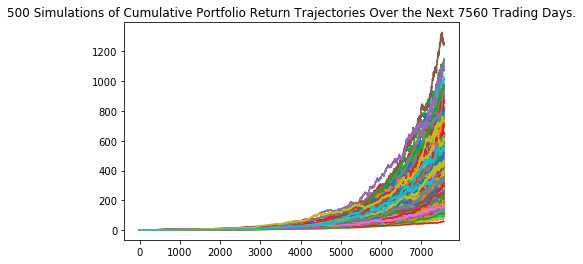

In [19]:
# Plot simulation outcomes
line_plot = monte_carlo_thirty_year.plot_simulation()

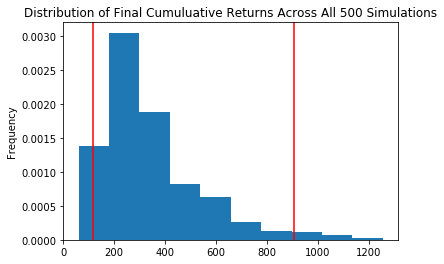

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = monte_carlo_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = monte_carlo_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             342.353674
std              198.982065
min               59.675943
25%              207.035214
50%              287.718586
75%              415.737284
max             1255.659974
95% CI Lower     114.803596
95% CI Upper     906.821281
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
interval_lower = round(tbl[8] * initial_investment,2)
interval_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There's a 95% chance that, over the next 30 years, an initial investment of ${initial_investment} in the portfolio"
      f" would have a result ranging between"
      f" ${interval_lower} and ${interval_upper}")

There's a 95% chance that, over the next 30 years, an initial investment of $20000 in the portfolio would have a result ranging between $2296071.91 and $18136425.62


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
interval_lower = round(tbl[8] * initial_investment,2)
interval_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There's a 95% chance that, over the next 30 years, an initial investment of ${initial_investment} in the portfolio"
      f"  would have a result ranging between"
      f" ${interval_lower} and ${interval_upper}")

There's a 95% chance that, over the next 30 years, an initial investment of $30000.0 in the portfolio  would have a result ranging between $3444107.87 and $27204638.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996554,1.001196,1.006953,1.000020,1.002767,1.001993,0.998334,0.998234,0.998297,0.994551,...,1.003038,0.999232,0.998785,0.996801,1.002167,0.999108,1.000281,1.004115,0.998493,1.000052
2,0.994996,1.000059,0.998425,1.002837,0.999606,1.002832,0.998968,0.997269,0.997175,0.995238,...,1.004522,0.996421,0.993920,0.996032,1.001827,0.997886,1.000682,1.004799,0.996672,1.000428
3,0.993537,0.997803,0.997068,1.002682,0.994742,1.005529,1.000423,0.998519,0.999527,0.994548,...,1.005380,0.997145,0.991800,0.994719,1.001862,0.997905,0.999296,1.002259,1.001085,1.001406
4,0.992107,0.999766,0.992394,1.004164,0.994871,1.009578,1.002271,0.996018,1.000258,1.002480,...,1.005848,0.998857,0.995702,1.000975,1.002805,1.000951,0.995747,0.998211,1.004249,0.996141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.978405,1.010698,1.100907,1.093238,1.174833,1.272717,1.006057,1.064578,0.907474,1.092436,...,1.209851,0.945242,1.067381,1.072811,1.055901,1.232818,1.047177,1.066273,1.118326,1.310527
1257,0.985664,1.011377,1.098902,1.094576,1.174239,1.280508,1.002435,1.063798,0.905295,1.095840,...,1.213534,0.945474,1.069645,1.071911,1.052645,1.235392,1.046056,1.066259,1.121762,1.310082
1258,0.988826,1.012314,1.101628,1.092080,1.176666,1.283675,1.003830,1.065576,0.906683,1.091330,...,1.210483,0.946833,1.069726,1.078926,1.051437,1.235474,1.047439,1.065171,1.119234,1.315456
1259,0.988742,1.008331,1.101444,1.094565,1.177651,1.287436,1.008509,1.066021,0.904185,1.089685,...,1.212912,0.945913,1.069013,1.080669,1.052984,1.240877,1.044660,1.070091,1.117808,1.312889


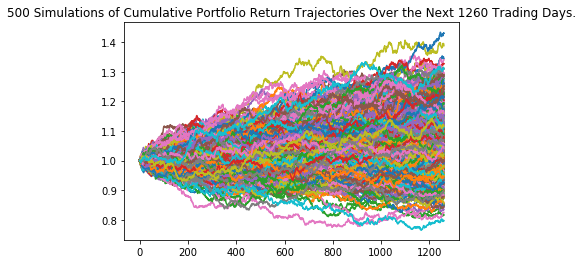

In [29]:
# Plot simulation outcomes
line_plot_five = monte_carlo_five_year.plot_simulation()

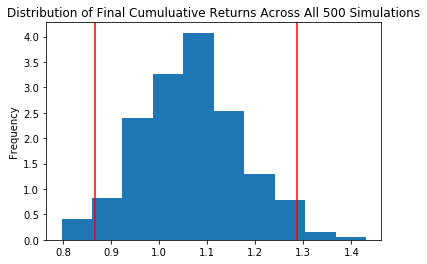

In [30]:
# Plot probability distribution and confidence intervals
dist_plot_five = monte_carlo_five_year.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = monte_carlo_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.065953
std               0.104436
min               0.797128
25%               0.995381
50%               1.065022
75%               1.123482
max               1.430176
95% CI Lower      0.865853
95% CI Upper      1.286971
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


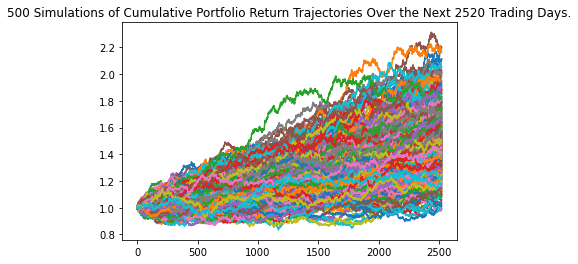

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

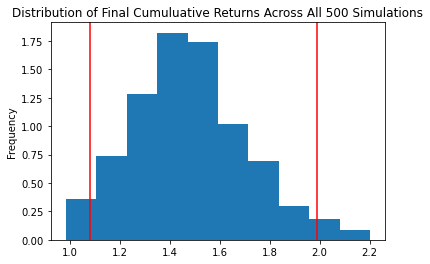

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
